<a href="https://colab.research.google.com/github/alissonfreitas10/Repositorio_1/blob/master/Projeto_3_An%C3%A1lise_Explorat%C3%B3ria_de_Dados_Doen%C3%A7as_Cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados - Doenças Cardiovasculares

Doenças cardiovasculares são uma classe contendo diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Dentro da classe, existem várias doenças como angina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/396260-PCIO15-306.jpg"></center>

Apesar de ser uma das principais causas de morte em todo o mundo, estima-se que cerca de 90% das doenças cardiovasculares poderiam ser evitadas por meio da adoção de algumas medidas e mudanças no *lifestyle*.

Existem hoje várias pesquisas na área de *Machine Learning* visando a construções de modelos preditivos que ajudem os médicos a descobrirem doenças cardiovasculares em seus pacientes.

Estudos publicados na revista *na revista Nature Biomedical Engineering* mostram que algoritmos de *Deep Learning* foram capazes de antecipar doenças cardíacas em até 5 anos.

Definitivamente, o uso de Inteligência Artificial tem impactado profundamente a área da saúde, e tem proporcionado aos profissionais médicos insumos de inteligência cada vez mais precisos.



## Obtenção dos Dados

O conjunto principal de dados usado neste projeto foi coletado da ***Cleveland Clinic Foundation*** e se encontra disponível no conhecido [Repositório UCI *Machine Learning*](https://archive.ics.uci.edu/ml/datasets/heart+Disease). Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O *dataset* processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de *Data Science* usará essas mesmas 14 variáveis principais.

<p><img alt="Colaboratory logo" height="100" src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/Large45.jpg" align="right" hspace="20px" vspace="0px"></p>

* O arquivo `csv` com os dados de 303 pessoas e 14 atributos pode ser baixado [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv).

* O arquivo contendo todos os detalhes e documentação do *dataset* usado neste projeto se encontra [neste link](https://github.com/carlosfab/curso_data_science_na_pratica/blob/master/modulo_03/heart-disease.names).

* Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).



### Informações sobre os atributos:


* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

### Importar e tratando os Dados

Em uma etapa inicial, importaremos os dois *datasets* mencionados no início do *notebook*:

* Um contendo os dados relacionados às doenças cardiovasculares (303 pessoas e 14 atributos); e
* Um contendo os dados da mortalidade no Brasil por doenças cardiovasculares.

In [0]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt

# url dos datasets
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

# importar dataset da UCI
df = pd.read_csv(dataset_uci)

# importar dataset dos indíces do Brasil 
df_brasil = pd.read_csv(dataset_brasil)

Olhando acima as informações sobre os atributos, percebemos que nossa variável alvo (`num`) possui cinco valores possíveis: \[0, 1, 2, 3, 4\].

No entanto, seguindo a maioria das pesquisas que utilizaram esse *dataset*, iremos considerar apenas duas situações possíveis:

* **0** - não há doença cardíaca
* **1** - há doença cardíaca

Então, iremos igualar a 1 os valores compreendidos entre 1-4.

In [0]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [0]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [0]:
# variável alvo após converter o valores
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

##Analisando o DataFrame

###Tamanho dos DataFrame 

Vamos analisar o tamanho dos DataFrame que iremos trabalhar. 

In [0]:
# Ver o tamanho do dataframe 'df'
df.shape

(303, 14)

In [0]:
# Ver o tamanho do dataframe 'df_brasil'
df_brasil.shape

(14, 2)

###Descrição Estatística
Para melhor entender estatísticamente o datafreme, usaremos uma função para descreve-las. Aqui poderemos ver alguns dados muito relevantes como: o total de entradas, média, mediana entre outras. 

In [0]:
# Ver a descrição estatística do df
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [0]:
# Descrição estatística do df_brasil
df_brasil.describe()

,ano,mortes_doencas_cardio
count,14.0000,14.000000
mean,2010.5000,327.792500
std,4.1833,27.813466
min,2004.0000,283.927000
25%,2007.2500,310.798750
50%,2010.5000,329.833000
75%,2013.7500,340.131000
max,2017.0000,383.961000


### Tipos de variáveis
Como podemos ver abaixo na função `dtypes` que os dataframe utiliza-se de apenas dois tipos de variáveis, uma do tipo int e a outra do tipo float.

In [0]:
# tipos das variáveis do df (dtypes)
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [0]:
#tipos das variáveis do df_brasil
df_brasil.dtypes

ano                        int64
mortes_doencas_cardio    float64
dtype: object

###Visualizado os DataFrames 
Visualizando algumas linhas do DataFrame para melhor entendimento. Para isso, usaremos a função `head`.

In [0]:
# Visualizado as 5 primeiras linha do df.
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [0]:
# as 5 primeiras linha do df_brasil
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


###Análise das Pessoas Doentes
Podemos observar abaixo a quantidade de pessoas que tem algum tipo de doenças cardiovascular e as que não tem.

In [0]:
# contando quantas entradas tem e não tem doenças cardiacas
print('Existe {} pessoas sem doenças cardíacas. '.format(df.num.value_counts()[0]))
print('Existe {} pessoas com doenças cardíacas. '.format(df.num.value_counts()[1]))

Existe 164 pessoas sem doenças cardíacas. 
Existe 139 pessoas com doenças cardíacas. 


###Valores Ausentes
Como podemos observar que o dataframe não existe nem um valor ausente. 

In [0]:
# valores ausentes do df
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Mortes por Doenças Cardiovasculares no Brasil
Podemos ver no gráfico de linha abaixo que as mortes por doenças cardiacas no Brasil vem crescendo ao passar dos anos, como também podemos afirmar que as mortes são diretamente proporcional aos anos. 

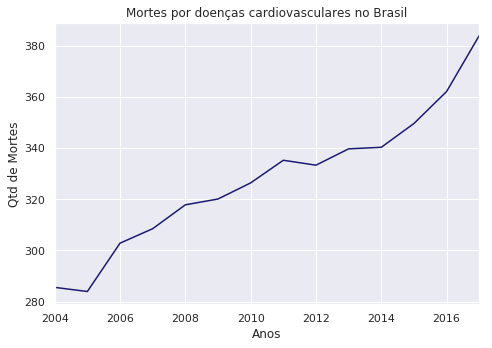

In [0]:
# gráfico de linha do df_brasil
fig, ax = plt.subplots(figsize=(7,5))

df_brasil.plot(x='ano', y='mortes_doencas_cardio',kind='line',c='midnightblue', ax=ax, legend=False, grid=True)
ax.set_title('Mortes por doenças cardiovasculares no Brasil')
ax.set_xlabel('Anos')
ax.set_ylabel('Qtd de Mortes')

plt.tight_layout()

###Gráfico por Gênero
Após plotar o gráfico, ficou claro que a quantidade de homens é praticamento o dobro da quantidade de mulheres nesse dataframe. 

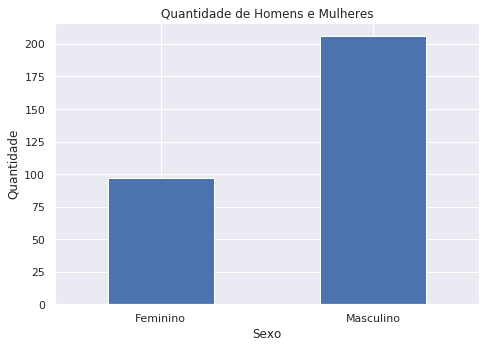

In [0]:
#gráfico de barras com a quantidade de homens e mulheres do df
fig, ax = plt.subplots(figsize=(7,5))


df.sex.value_counts(ascending=True).plot(kind='bar',rot=0, ax=ax)
ax.set_title('Quantidade de Homens e Mulheres')
ax.set_ylabel('Quantidade')
ax.set_xlabel('Sexo')


#modificando os rotulos das colunas por Feminino e Masculino.
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'Feminino'
labels[1] = 'Masculino'
ax.set_xticklabels(labels)

plt.tight_layout()

###Relação entre a Idade e os nível de Colesterol
Para essa relação utizamos um gráfico de dispersão, onde podemos observar que há uma forte relação entre o aumento dos niveis de colesterol com o aumento da idade dos pacientes. Pois a partir de 40 anos é visível esses números nos pacientes que segue até próximo aos 70 anos, tendo em vista poucos paciente com idade superir a essa. 


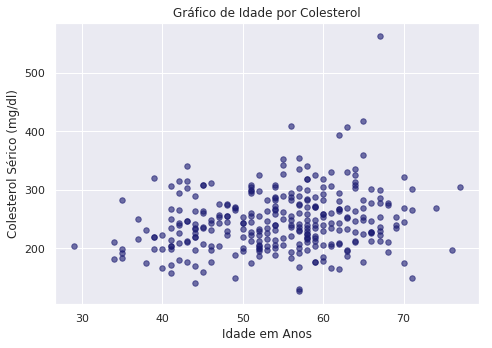

In [0]:
# gráfico de dispersão de idade por colesterol
fig, ax = plt.subplots(figsize =(7,5))


df.plot.scatter(x='age', y='chol', s=30, c='midnightblue', ax=ax, alpha=0.6)
ax.set_title('Gráfico de Idade por Colesterol')
ax.set_xlabel('Idade em Anos')
ax.set_ylabel('Colesterol Sérico (mg/dl)')


plt.tight_layout()

###Colesterol Sérico
Segundo a Sociedade Brasileira de Cardiologia, o ideal é ter um total de colesterol inferior a 200mg/dL de sangue. E é observado no histograma que a maiorias dos pacientes, cerca de 83%, estão acima desse limite e esse número aumenta com o avanço da idade. 

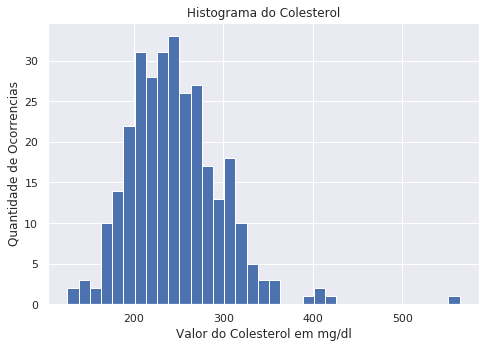

In [0]:
#plotar histograma do colesterol
fig, ax = plt.subplots(figsize=(7,5))

df.chol.plot(kind='hist', ax=ax, bins=35, grid=True)
ax.set_title('Histograma do Colesterol')
ax.set_xlabel('Valor do Colesterol em mg/dl')
ax.set_ylabel('Quantidade de Ocorrencias')

plt.tight_layout()

In [0]:
#porcentagem de pacientes com o colesterol acima de 200
print('No dataframe existe {:.2f}% dos pacientes com o colesterol acima do ideal.'.format(df.chol[df.chol>=200].value_counts().sum() / df.shape[0]*100))

No dataframe existe 83.83% dos pacientes com o colesterol acima do ideal.


###Analise dos Resultados dos Eletrocardiografia em Repouso

O resultado dos eletrocardiografia é dividida em três resultados distintos. Onde o primeiro seria completamento normal, que representa cerca de 48,8%. O segundo é considerado uma anormalidade de ST-T, que é apenas 1,3%. Já o terceiro resultado é onde há uma provável ou definitiva hipertrofia ventricular, com cerca de48,8% dos casos. Em outras palavras, o exame de Eletrocardiografia constatou que a metade dos pacientes desse dataframe apresentou problemas cardíoco. 

In [0]:
#extraindo os resultados para um dicionário
result_elet = dict(df.restecg.value_counts())

#preparar os dados para pie chart
labels = 'Normal', 'Hiportrofia Ventricular', 'Anormal'
sizes = result_elet.values()
explode = (0.05, 0.05, 0)

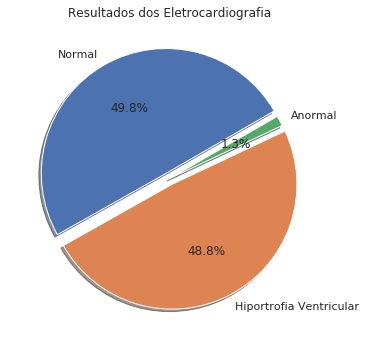

In [0]:
#plotando gráfico pizza
fig, ax = plt.subplots(figsize=(7,5))

ax.pie(sizes, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%', startangle=30)
ax.set_title('Resultados dos Eletrocardiografia')

plt.tight_layout()

###Correlações entre as variáveis

Para melhor identifica as correlações existentes no dataframe, será gerado um heatmap que é criado apartir de uma matriz de correlação. Onde será utilizado todas as variáveis do dataframe.

Após gerar o gráfico foi observado algumas correlações. Dentre elas, as duas maiores são entre as variáveis *slope* e *oldpeak*, com também as *num* e a *thal*, que tiveram uma correlação superior a 50%. 

Podendo também ser observa outras quatro correlações um pouco acima dos 40%, que são as *sp*, *exang*, *oldpeak* e *ca* com relação ao variável *num*. 


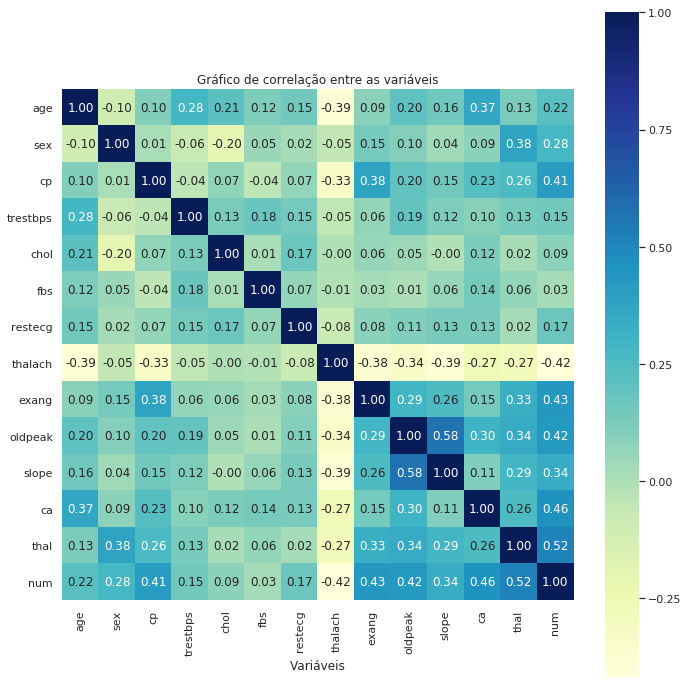

In [0]:
# importando biblioteca seaborn
import seaborn as sns


# criar uma matriz de correlação
corr = df[['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'num' ]].corr()
sns.set(font_scale=1)
plt.figure(figsize=(10,10))

# criando o heatmap 
sns.heatmap(corr, cmap="YlGnBu", fmt='.2f', square=True, linecolor='white', annot=True )
plt.title('Gráfico de correlação entre as variáveis')
plt.xlabel('Variáveis')


plt.tight_layout()


Caro Carlos,
Tentei fazer alguns análises além do que foi solicitado mais não consequi expor os dados, por exemplo:

1- fazer uma relação dos paciente que tem angina induzida pelo exercicio(exang) com as idades(age), agrupando as idade acada 10 anos. 

2- fazer uma relação dos paciente com o colesterol sérico elevado com as idades(age), agrupando as idade acada 10 anos. 

3- fazer uma relação dos paciente com diagnóstico de doenças cardiacas(num), agrupando as idade acada 10 anos. 

4-fazer uma relação dos paciente com tipo da dor torácica (cp), em relação ao sexo do paciente(sex).
